python=3.10

In [451]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import torch#task: torch를 이용해서 성능개선
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [452]:
df = pd.read_csv("C:/Users/alsgh/OneDrive - dgu.ac.kr/바탕 화면/manhattan.csv")
df.head()#데이터셋 연결 확인

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [453]:
print(len(df.columns))#파일 연결 확인(특성 수 파악)

18


안쓰는 특성들을 정리

In [454]:
df = df.drop(['neighborhood','borough','rental_id'],axis = 1)#index는 예측값에 영향이 없다
print(df.columns)
print(len(df.columns))
print(len(df))#샘플 갯수 확인



Index(['rent', 'bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
       'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
       'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio',
       'has_gym'],
      dtype='object')
15
3539


In [455]:
x = df[['bedrooms','bathrooms','size_sqft',
        'min_to_subway','floor','building_age_yrs','no_fee','has_roofdeck',
       'has_washer_dryer','has_doorman','has_elevator','has_dishwasher',
       'has_patio','has_gym']]
y = df[['rent']]#task:집값을 예측

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,test_size = 0.2)
#train data:test data = 8:2 비율로 나눔

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2831, 14) (708, 14) (2831, 1) (708, 1)


기존에 사용한 모델
LinearRegression


In [456]:
mlr = LinearRegression(fit_intercept = True) #선형회귀
mlr.fit(x_train,y_train)

LinearRegression()

In [457]:
my_apartment = [[1,1,620,16,1,98,1,0,1,0,0,1,1,0]] #14개의 x값(임대료에 영향을 주는 값) 대입
my_predict= mlr.predict(my_apartment) #LinearRegression을 통한 주택 임대료 예측
my_predict #위와같은 x값을 대입했을 때 주택임대료 값

c:\Users\alsgh\anaconda3\envs\py10\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2499.07371638]])

In [458]:
y_predict = mlr.predict(x_test) #x_test를 넣어 예측한 값들을 y_predict이라고 가정
y_predict

array([[ 3644.39812665],
       [ 8705.79069523],
       [ 7315.93138153],
       [ 4508.9382707 ],
       [ 1318.12031042],
       [ 3252.00407265],
       [ 7564.83883705],
       [ 3746.97073226],
       [ 4443.78496369],
       [ 4712.75995288],
       [ 7995.50814055],
       [ 3477.9651175 ],
       [ 8248.41157149],
       [ 5697.13156741],
       [ 2628.94343977],
       [ 4943.93257134],
       [ 2086.71003616],
       [ 4789.14993437],
       [ 7309.24576292],
       [ 2817.72160892],
       [ 5291.25492678],
       [ 3594.43454269],
       [ 4851.09916281],
       [ 3134.73730876],
       [ 6777.45014385],
       [ 3098.74997462],
       [ 6192.82886304],
       [ 3401.15215756],
       [ 9085.75509359],
       [ 2271.69098409],
       [ 3351.00315116],
       [ 3492.53543953],
       [ 2973.29125771],
       [ 7270.58278139],
       [ 2277.66639527],
       [ 7084.22222086],
       [ 8945.79602659],
       [ 4036.02144942],
       [ 1663.60869703],
       [ 6557.19879322],


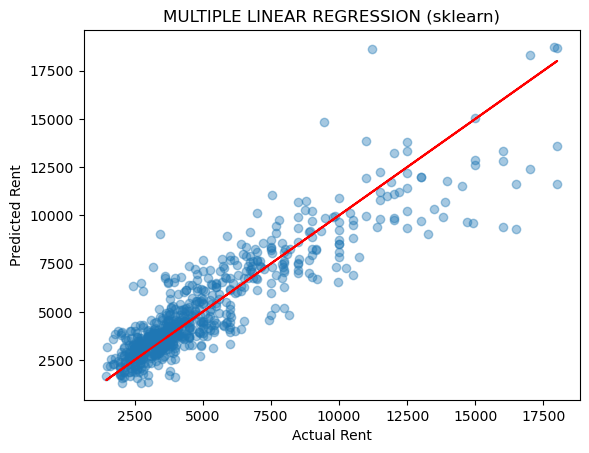

In [459]:
plt.scatter(y_test,y_predict,alpha = 0.4)
plt.plot(y_test, y_test, c='r')
plt.xlabel('Actual Rent') #x축은 실제 주택임대료
plt.ylabel('Predicted Rent') #y축은 데이터를 통해 예측한 주택임대료
plt.title('MULTIPLE LINEAR REGRESSION (sklearn)')# 다중선형회귀
plt.show() #그래프그려줌

In [460]:
def mse_loss(pre, y): #손실함수 mse함수 정의
    return((pre-y)**2).mean()
mlr.fit(x,y)
pre = mlr.predict(x)

loss_value = mse_loss(pre,y) #주택임대료 예측값과 실제값을 mse값 구하는 함수에 대입

print(loss_value) # Linear Regression의 손실함수 결과값

rent    2.207072e+06
dtype: float64


기존의 모델은 DecisionTree모델과 LinearRegression을 사용하였으나 

성능은 Linear Regression이 loss value 2.2/ Decision Tree의 loss value가 2.9로

더 낮은 Linear Regression으로 성능 개선을 할 예정입니다.


---------------------------------------------------------------

아래부턴 성능 개선을 위한 새 모델 설계

In [461]:
new_x =torch.Tensor(x_train.values)
new_y =torch.Tensor(y_train.values)
# x값 데이터 정규화
mean_x = torch.mean(new_x,dim=0)
std_x =torch.std(new_x,dim=0)
nom_x = (new_x- mean_x) / std_x
##StandardScaler 함수를 통해 정규화 하니깐 튀는 값들이 많다.

print(nom_x)#정규화 한 값 확인

tensor([[-1.4003, -0.6106, -0.8805,  ..., -0.4821, -0.2398, -0.4647],
        [-0.3721, -0.6106, -0.3712,  ...,  2.0736, -0.2398, -0.4647],
        [-0.3721, -0.6106, -0.5799,  ..., -0.4821, -0.2398, -0.4647],
        ...,
        [ 0.6561,  1.0500,  2.2087,  ..., -0.4821, -0.2398, -0.4647],
        [-0.3721, -0.6106, -0.7678,  ..., -0.4821, -0.2398, -0.4647],
        [ 0.6561,  1.0500,  1.4782,  ..., -0.4821, -0.2398, -0.4647]])


In [462]:
# y값 정규화
mean_y = torch.mean(new_y, dim=0)
std_y = torch.std(new_y, dim=0)
nom_y = (new_y - mean_y) / std_y

print(nom_y) 


tensor([[-0.6935],
        [-0.4190],
        [-0.1492],
        ...,
        [ 4.1853],
        [-0.5288],
        [ 0.2320]])


정규화한 값을 이용해 split

In [463]:
# 훈련 데이터와 테스트 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(nom_x, nom_y, 
                                                    train_size=0.8, test_size=0.2, random_state=42)


In [464]:
# 다항회귀를 이용(이용하려는 특성 수가 많음)
#모델에 대한 정의
class PolynomialRegressionModel(nn.Module):
    def __init__(self, input_size, degree):
        super(PolynomialRegressionModel, self).__init__()
        self.degree = degree
        self.poly = nn.Linear(degree * input_size, 1, bias=False)

    def forward(self, x):
        x_poly = torch.cat([x**i for i in range(1, self.degree+1)], dim=1)
        return self.poly(x_poly)

In [465]:
# 모델 초기화
input_size = x_train.shape[1]
degree = 2  # 다항 회귀의 차수
poly_model = PolynomialRegressionModel(input_size, degree)

# 손실 함수와 옵티마이저 정의
criterion = nn.MSELoss()
optimizer = optim.Adam(poly_model.parameters(), lr=0.01)


In [466]:
# 텐서로 변환
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)


C:\Users\alsgh\AppData\Local\Temp\ipykernel_11880\2497171313.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
C:\Users\alsgh\AppData\Local\Temp\ipykernel_11880\2497171313.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32)


In [467]:
## 학습

num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = poly_model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 출력
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.2301
Epoch [200/1000], Loss: 0.2195
Epoch [300/1000], Loss: 0.2184
Epoch [400/1000], Loss: 0.2183
Epoch [500/1000], Loss: 0.2183
Epoch [600/1000], Loss: 0.2183
Epoch [700/1000], Loss: 0.2183
Epoch [800/1000], Loss: 0.2183
Epoch [900/1000], Loss: 0.2183
Epoch [1000/1000], Loss: 0.2183


In [468]:
# 테스트 데이터에 대한 예측
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_pred_tensor = poly_model(x_test_tensor)
y_pred = y_pred_tensor.detach().numpy()

C:\Users\alsgh\AppData\Local\Temp\ipykernel_11880\3619261423.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test_tensor = torch.tensor(x_test, dtype=torch.float32)


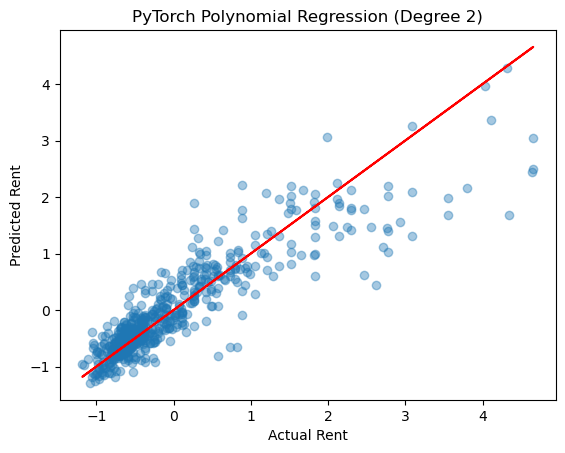

In [469]:
# 그래프 그리기
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot(y_test, y_test, c='r')
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title(f'PyTorch Polynomial Regression (Degree {degree})')
plt.show()

In [470]:
# 손실 계산
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
test_loss = criterion(y_pred_tensor, y_test_tensor)
print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 0.2109


C:\Users\alsgh\AppData\Local\Temp\ipykernel_11880\1346276089.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
